# Lens modeling of DESIJ1018-0121 with `lenstronomy`
**Authors:** MD. Jobair Hasan, Anowar Shajib

## **<u>A Synopsis of the Modeling History:</u>**
<p>We assumed the arc spanning from around 2 O'clock position to around 8 O'clock position as the main component of the gravitational lensing arc with a smaller blob at around 10:30 as its counter image. Masking was done covering non-lensing elements of the image.</p>
<p>The modeling was started with a model consists of the following lens, source and lens-light profiles:
    
    lens_model_list = ["EPL", "SHEAR"]
    source_model_list = ["SERSIC_ELLIPSE", "SHAPELETS"]
    lens_light_model_list = ["SERSIC_ELLIPSE"]

and the constraints: 
    
    joint_lens_with_light = [[0, 0, ['center_x', 'center_y', 'e1', 'e2']]]
    joint_source_with_source = [[0, 1, ["center_x", "center_y"]]]
</p>
<p>The reduced chi-squared value converged at around 1.20. It was saturated and not improving any further. At that point, we realized that the constraints should not be applied and we should fit the model as flexibly as possible, and thus removed the constraints. The PSO of the resulting new model was very promising, giving a value of around 0.99 and also a nice convergence of the MCMC chain, but the corner plot showed that it had two different maxima for quite a few of the 2-variable cases. This result and a realization that the model is overfitting the data due to the removal of the constraint `joint_source_with_source` convinced us to put the constraint back and refit the model. This newer model converged at around 1.05 in PSO and 0.93 in MCMC.</p>

## Installing and Importing the required packages:

In [ ]:
import corner

# import the necessary python libraries:
import h5py
import joblib

# make sure lenstronomy is installed, otherwise install the latest pip version:
import lenstronomy.Util.mask_util as mk
import matplotlib.pyplot as plt
import numpy as np
from lenstronomy.Plots.model_plot import ModelPlot
from lenstronomy.Workflow.fitting_sequence import FittingSequence

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 30.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for lenstronomy: filename=lenstronomy-1.11.2-py3-none-any.whl size=1086841 sha256=da9237b514d6e119e53814074053b42fd9774ef0fc2100b16bc1663353d52262
  Stored in directory: /root/.cache/pip/wheels/1c/62/fa/1c6f5bd9f9e9e37978c5ef811810e69118ea87f2a1cd0b946d
  Created wheel for schwimmbad: filename=schwimmbad-0.3.2-py3-none-any.whl size=15728 sha256=79dd6a1fc342a6e057d73fe35a05396f6ec95f77b7be27c06272bad6921415b2
  Stored in directory: /root/.cache/pip/wheels/4a/ea/3e/b79646d96eaea548b8eec6d2caed656a3c7f17ce5f264484b8
Successfully built lenstronomy schwimmbad
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


## Reading the data file:

In [ ]:
with h5py.File("DESIJ1018-0121_F140W.h5", "r") as f:
    kwargs_data = {}
    for key in f:
        kwargs_data[key] = f[key][()]

kwargs_data

{'background_rms': 0.018610074701766573,
 'dec_at_xy_0': -5.799999999999994,
 'exposure_time': array([[486.32956, 387.50772, 555.4221 , ..., 561.57306, 436.89725,
         453.8047 ],
        [525.3609 , 455.32626, 433.4547 , ..., 467.7759 , 393.7413 ,
         575.8005 ],
        [406.4474 , 553.6718 , 442.7201 , ..., 439.1787 , 455.65027,
         465.92584],
        ...,
        [424.9911 , 470.85703, 480.29526, ..., 431.6869 , 500.74237,
         476.34906],
        [416.17792, 491.75076, 384.38663, ..., 364.7395 , 248.40552,
         394.68134],
        [461.31955, 487.39075, 457.4765 , ..., 516.8107 , 438.08667,
         375.04907]], dtype=float32),
 'image_data': array([[ 0.01961958, -0.00048153, -0.01787547, ..., -0.01659699,
         -0.00921571,  0.01057982],
        [ 0.02892776,  0.01651465, -0.00482212, ..., -0.00829422,
         -0.00578246,  0.0005834 ],
        [ 0.01247546,  0.00889849,  0.00884483, ...,  0.01536562,
          0.0021972 , -0.01391137],
        ...,
   

## Loading the PSF data:

In [ ]:
with h5py.File("psf_F140W.h5", "r") as f:
    kwargs_psf = {}
    for key in f:
        kwargs_psf[key] = f[key][()]

kwargs_psf["psf_type"] = "PIXEL"

kwargs_psf

{'kernel_point_source': array([[5.7422681e-06, 4.5087054e-06, 2.4900439e-06, ..., 1.8486933e-06,
         3.2385867e-06, 4.4331632e-06],
        [3.9503216e-06, 9.9817180e-06, 6.5966469e-06, ..., 3.9997908e-06,
         6.6143798e-06, 4.1430776e-06],
        [2.9697005e-06, 5.5563592e-06, 1.2795975e-05, ..., 7.8115263e-06,
         5.1404800e-06, 1.7530243e-06],
        ...,
        [1.6921831e-06, 3.7347368e-06, 7.6415899e-06, ..., 1.1465157e-05,
         5.3933368e-06, 1.6360833e-06],
        [2.8819463e-06, 6.2348781e-06, 4.7564718e-06, ..., 4.5906190e-06,
         8.7221979e-06, 3.7005334e-06],
        [3.7170516e-06, 3.6243027e-06, 1.6518559e-06, ..., 2.0127884e-06,
         3.2246478e-06, 5.1252514e-06]], dtype=float32),
 'psf_type': 'PIXEL'}

## Geting the image data from `kwargs_data` and ploting it:

/tmp/ipykernel_20/4001803415.py:4: RuntimeWarning: invalid value encountered in log10
  ax1.matshow(np.log10(image_data), origin='lower', cmap='cubehelix')
/tmp/ipykernel_20/4001803415.py:5: RuntimeWarning: invalid value encountered in log10
  ax2.matshow(np.log10(image_data), origin='lower', cmap='cubehelix')


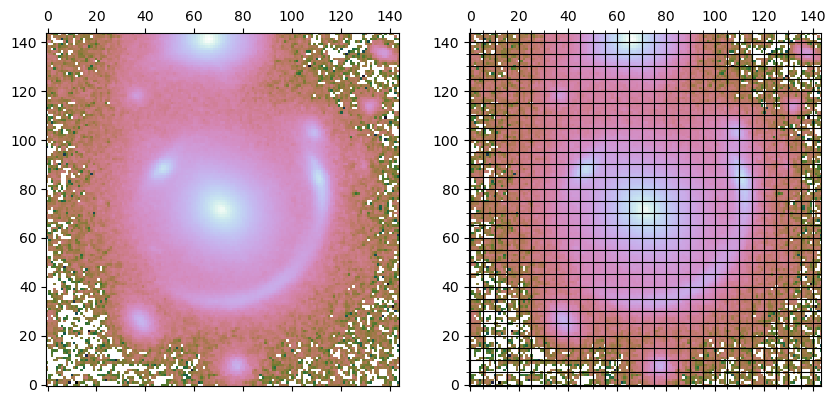

In [ ]:
image_data = kwargs_data["image_data"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.matshow(np.log10(image_data), origin="lower", cmap="cubehelix")
ax2.matshow(np.log10(image_data), origin="lower", cmap="cubehelix")
ax2.grid(which="both", color="black")
ax2.minorticks_on()
ax2.grid(which="minor", color="black")
plt.show()

## Making the Likelihood mask and ploting it:

/tmp/ipykernel_20/3773302040.py:26: RuntimeWarning: invalid value encountered in log10
  image = np.log10(image_data)
/tmp/ipykernel_20/3773302040.py:27: RuntimeWarning: divide by zero encountered in log10
  masked_image = np.log10(np.multiply(image_data, mask))
/tmp/ipykernel_20/3773302040.py:27: RuntimeWarning: invalid value encountered in log10
  masked_image = np.log10(np.multiply(image_data, mask))


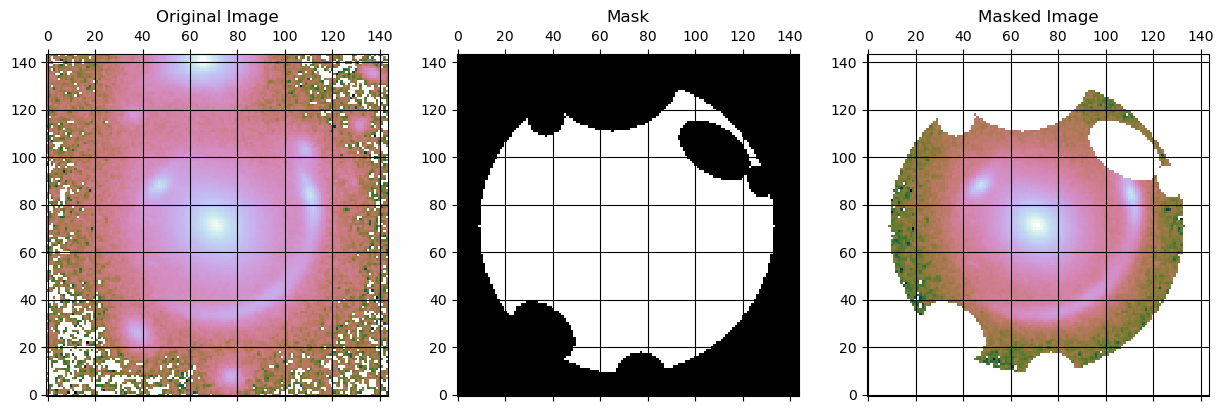

In [ ]:
x_c, y_c = np.meshgrid(np.arange(144), np.arange(144))
mask = 1 - mk.mask_center_2d(71, 71, 62, x_c, y_c)

mask_params = [
    [65, 140, 30, 29, 0],
    # [55, 45, 2, 2, 0],
    [108, 103, 17, 10, np.pi * 145 / 180],
    [77, 7, 11, 11, 0],
    [36, 27, 15, 10, np.pi * 140 / 180],
    [37, 117, 8, 8, 0],
    [127, 90, 7, 5, np.pi * 115 / 180],
    # [47, 88, 10, 5, np.pi*45/180]
]

for mask_param in mask_params:
    mask *= 1 - mk.mask_ellipse(
        x_c,
        y_c,
        mask_param[0],
        mask_param[1],
        mask_param[2],
        mask_param[3],
        mask_param[4],
    )

mask[mask >= 1] = 1
mask[mask < 0] = 0

image = np.log10(image_data)
masked_image = np.log10(np.multiply(image_data, mask))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.matshow(image, origin="lower", cmap="cubehelix")
ax1.grid(which="both", color="black")
ax1.grid(which="minor", color="black")
ax1.title.set_text("Original Image")
ax2.matshow(mask, origin="lower", cmap="gray")
ax2.grid(which="both", color="black")
ax2.grid(which="minor", color="black")
ax2.title.set_text("Mask")
ax3.matshow(masked_image, origin="lower", cmap="cubehelix")
ax3.grid(which="both", color="black")
ax3.grid(which="minor", color="black")
ax3.title.set_text("Masked Image")

## Initial Lensing Model Fitting with the Created Mask using `Lenstronomy`

In [ ]:
lens_model_list = ["EPL", "SHEAR"]
source_model_list = ["SERSIC_ELLIPSE", "SHAPELETS"]
lens_light_model_list = ["SERSIC_ELLIPSE"]

In [ ]:
# lens galaxy's mass model
fixed_lens = []
kwargs_lens_init = [
    {
        "theta_E": 2.8781425409600296,
        "gamma": 2.0,
        "e1": 0.021413200869350456,
        "e2": 0.10359244109689184,
        "center_x": 0.10314548733617177,
        "center_y": -0.07645658795264434,
    },
    {
        "gamma1": 0.0172948087312718,
        "gamma2": -0.016985761564986095,
        "ra_0": 0.0,
        "dec_0": 0.0,
    },
]
kwargs_lens_sigma = []
kwargs_lower_lens = []
kwargs_upper_lens = []

fixed_lens.append({"gamma": 2.0})

fixed_lens.append({"ra_0": 0.0, "dec_0": 0.0})

kwargs_lens_sigma.append(
    {
        "theta_E": 0.2,
        "gamma": 0.1,
        "e1": 0.05,
        "e2": 0.05,
        "center_x": 0.5,
        "center_y": 0.5,
    }
)

kwargs_lens_sigma.append({"gamma1": 0.05, "gamma2": 0.05})

kwargs_lower_lens.append(
    {
        "theta_E": 0.01,
        "gamma": 1.0,
        "e1": -0.5,
        "e2": -0.5,
        "center_x": -10,
        "center_y": -10,
    }
)

kwargs_lower_lens.append({"gamma1": -0.3, "gamma2": -0.3})

kwargs_upper_lens.append(
    {
        "theta_E": 10.0,
        "gamma": 3.0,
        "e1": 0.5,
        "e2": 0.5,
        "center_x": 10,
        "center_y": 10,
    }
)

kwargs_upper_lens.append({"gamma1": 0.3, "gamma2": 0.3})

lens_params = [
    kwargs_lens_init,
    kwargs_lens_sigma,
    fixed_lens,
    kwargs_lower_lens,
    kwargs_upper_lens,
]


# lens galaxy's light model
fixed_lens_light = []
kwargs_lens_light_init = [
    {
        "amp": 1,
        "R_sersic": 1.249301353224054,
        "n_sersic": 4.0,
        "e1": 0.021413200869350456,
        "e2": 0.10359244109689184,
        "center_x": 0.10314548733617177,
        "center_y": -0.07645658795264434,
    }
]
kwargs_lens_light_sigma = []
kwargs_lower_lens_light = []
kwargs_upper_lens_light = []

fixed_lens_light.append({"n_sersic": 4.0})

kwargs_lens_light_sigma.append(
    {
        "n_sersic": 1,
        "R_sersic": 0.3,
        "e1": 0.05,
        "e2": 0.05,
        "center_x": 0.1,
        "center_y": 0.1,
        "amp": 10,
    }
)

kwargs_lower_lens_light.append(
    {
        "e1": -0.5,
        "e2": -0.5,
        "R_sersic": 0.001,
        "n_sersic": 0.5,
        "center_x": -10,
        "center_y": -10,
        "amp": 0,
    }
)

kwargs_upper_lens_light.append(
    {
        "e1": 0.5,
        "e2": 0.5,
        "R_sersic": 10,
        "n_sersic": 5.0,
        "center_x": 10,
        "center_y": 10,
        "amp": 100,
    }
)

# joint_lens_with_light = [[0, 0, ['center_x', 'center_y', 'e1', 'e2']]]

lens_light_params = [
    kwargs_lens_light_init,
    kwargs_lens_light_sigma,
    fixed_lens_light,
    kwargs_lower_lens_light,
    kwargs_upper_lens_light,
]


# source galaxy's light model
fixed_source = []
kwargs_source_init = [
    {
        "amp": 1,
        "R_sersic": 0.2243951545913847,
        "n_sersic": 1.0,
        "e1": 0.031446570666397305,
        "e2": -0.08645965853676447,
        "center_x": -0.26484686266794166,
        "center_y": -0.21785501426367085,
    },
    {
        "amp": 1,
        "n_max": 10,
        "beta": 0.03157782151741702,
        "center_x": -0.26484686266794166,
        "center_y": -0.21785501426367085,
    },
]
kwargs_source_sigma = []
kwargs_lower_source = []
kwargs_upper_source = []

fixed_source.append({"n_sersic": 1.0})

fixed_source.append({"n_max": 10})

kwargs_source_sigma.append(
    {
        "n_sersic": 0.5,
        "R_sersic": 0.1,
        "e1": 0.05,
        "e2": 0.05,
        "center_x": 0.2,
        "center_y": 0.2,
        "amp": 10,
    }
)

kwargs_source_sigma.append({"beta": 0.1, "center_x": 0.1, "center_y": 0.1})

kwargs_lower_source.append(
    {
        "e1": -0.5,
        "e2": -0.5,
        "R_sersic": 0.001,
        "n_sersic": 0.5,
        "center_x": -10,
        "center_y": -10,
        "amp": 0,
    }
)

kwargs_lower_source.append({"beta": 0.01, "center_x": -10, "center_y": -10})

kwargs_upper_source.append(
    {
        "e1": 0.5,
        "e2": 0.5,
        "R_sersic": 0.4,
        "n_sersic": 5.0,
        "center_x": 10,
        "center_y": 10,
        "amp": 100,
    }
)

kwargs_upper_source.append({"beta": 5, "center_x": 10, "center_y": 10})

joint_source_with_source = [[0, 1, ["center_x", "center_y"]]]

source_params = [
    kwargs_source_init,
    kwargs_source_sigma,
    fixed_source,
    kwargs_lower_source,
    kwargs_upper_source,
]

# combining all the above specification in the `kwargs_params` dictionary
kwargs_params = {
    "lens_model": lens_params,
    "source_model": source_params,
    "lens_light_model": lens_light_params,
}

kwargs_constraints = {  #'joint_lens_with_light': joint_lens_with_light,
    "joint_source_with_source": joint_source_with_source
}

In [ ]:
kwargs_likelihood = {"check_bounds": True, "image_likelihood_mask_list": [mask]}

kwargs_numerics = {"supersampling_factor": 1, "supersampling_convolution": False}

In [ ]:
kwargs_model = {
    "lens_model_list": lens_model_list,
    "source_light_model_list": source_model_list,
    "lens_light_model_list": lens_light_model_list,
}

multi_band_list = [[kwargs_data, kwargs_psf, kwargs_numerics]]

kwargs_data_joint = {
    "multi_band_list": multi_band_list,
    "multi_band_type": "single-band"
    # 'multi-linear': every imaging band has independent
    # solutions of the surface brightness,
    # 'joint-linear': there is one joint solution of the linear
    # coefficients demanded across the bands.
}

## Fitting the PSO sequence and Saving the resulting joblib file:

In [ ]:
fitting_seq = FittingSequence(
    kwargs_data_joint,
    kwargs_model,
    kwargs_constraints,
    kwargs_likelihood,
    kwargs_params,
)

fitting_kwargs_list = [
    ["PSO", {"sigma_scale": 1.0, "n_particles": 100, "n_iterations": 1000}],
]
chain_list = fitting_seq.fit_sequence(fitting_kwargs_list)
kwargs_result = fitting_seq.best_fit(bijective=False)

fit_output = chain_list
multi_band_list_out = fitting_seq.multi_band_list
kwargs_fixed_out = fitting_seq.kwargs_fixed

init_samples = None  # can be not `None` for MCMC

input = [
    fitting_kwargs_list,
    multi_band_list,
    kwargs_model,
    kwargs_constraints,
    kwargs_likelihood,
    kwargs_params,
    init_samples,
]
output = [kwargs_result, multi_band_list_out, fit_output, kwargs_fixed_out]

output_path = "./DESIJ1018-0121_pso_output.joblib"

with open(output_path, "wb") as f:
    joblib.dump([input, output], f, compress=True)

print(kwargs_result)

Computing the PSO ...
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
Converged after 347 iterations!
Best fit found:  -5181.745138697 [2.877700291036813, -0.017064794251099965, 0.1041494176930802, 0.1321800015508378, 0.005086665000591081, -0.009057299320301845, -0.02900878757293917, 0.28581152009566596, 0.00177171413403545, -0.060398080431626214, -0.3270165041556909, -0.1654001022822717, 0.04610060708883115, 1.2358176076114311, 0.02638327635622436, 0.1010038511162784, 0.102314756337696, -0.07801195035635555]
-1.0509573346916135 reduced X^2 of best position
-5181.745138697 log likelihood
9861 effective number of data points
[{'theta_E': 2.877700291036813, 'gamma': 2.0, 'e1': -0.017064794251099965, 'e2': 0.1041494176930802, 'center_x': 0.1321800015508378, 'center_y': 0.005086665000591081}, {'gamma1': -0.009057299320301845, 'gamma2': -0.02900878757293917, 'ra_0': 0.0, 'dec_0': 0.0}] lens result
[{'amp': 1, 'R_

## Visualization of the PSO fit:

-1.0418709343842698 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.0418709343842547


/opt/conda/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:43: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/opt/conda/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:101: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(self._data), origin='lower',
/opt/conda/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:136: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(self._model), origin='lower', vmin=v_min, vmax=v_max,
/tmp/ipykernel_20/2113972660.py:28: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


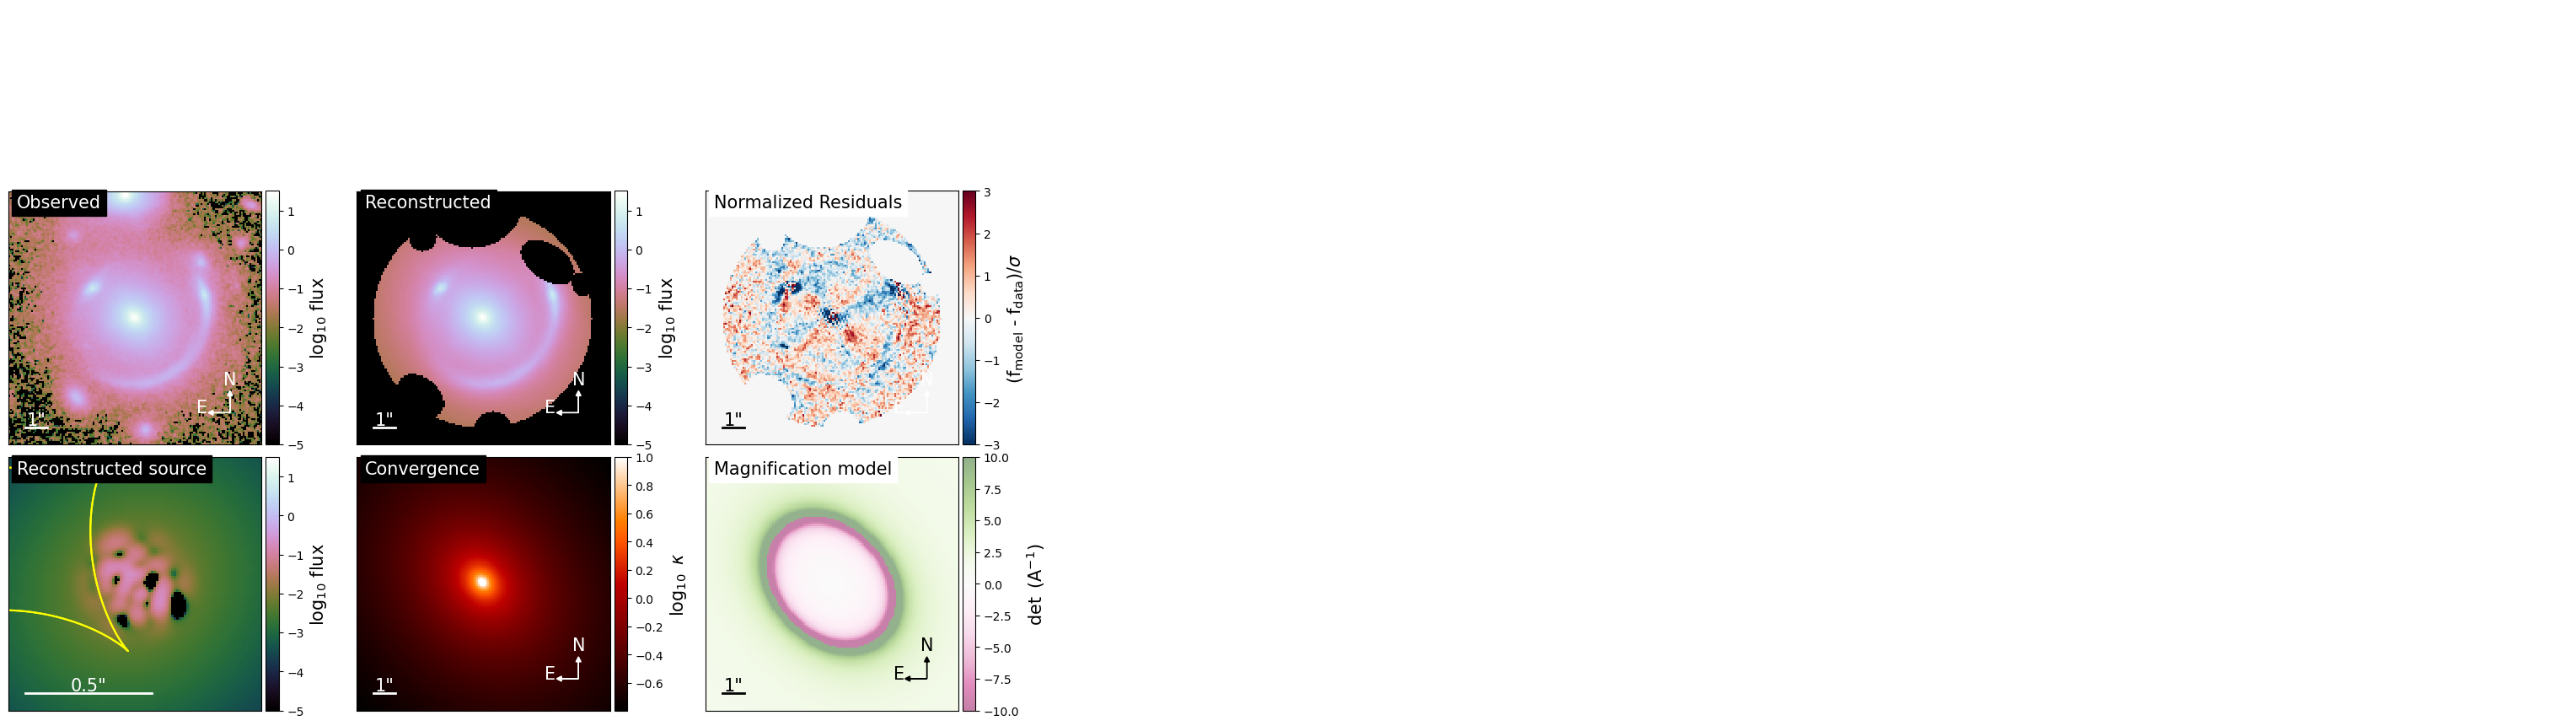

In [ ]:
model_plot = ModelPlot(
    multi_band_list,
    kwargs_model,
    kwargs_result,
    arrow_size=0.02,
    cmap_string="cubehelix",
    image_likelihood_mask_list=kwargs_likelihood["image_likelihood_mask_list"],
)

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

model_plot.data_plot(ax=axes[0, 0])
model_plot.model_plot(ax=axes[0, 1])
model_plot.normalized_residual_plot(ax=axes[0, 2], v_min=-3, v_max=3, cmap="RdBu_r")
model_plot.source_plot(
    ax=axes[1, 0], deltaPix_source=0.01, numPix=100, with_caustics=True, scale_size=0.5
)
model_plot.convergence_plot(ax=axes[1, 1], v_max=1, cmap="gist_heat")
model_plot.magnification_plot(ax=axes[1, 2], cmap="PiYG")
f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.0, hspace=0.05)
plt.show()

/opt/conda/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:511: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(model), origin='lower', vmin=v_min, vmax=v_max,


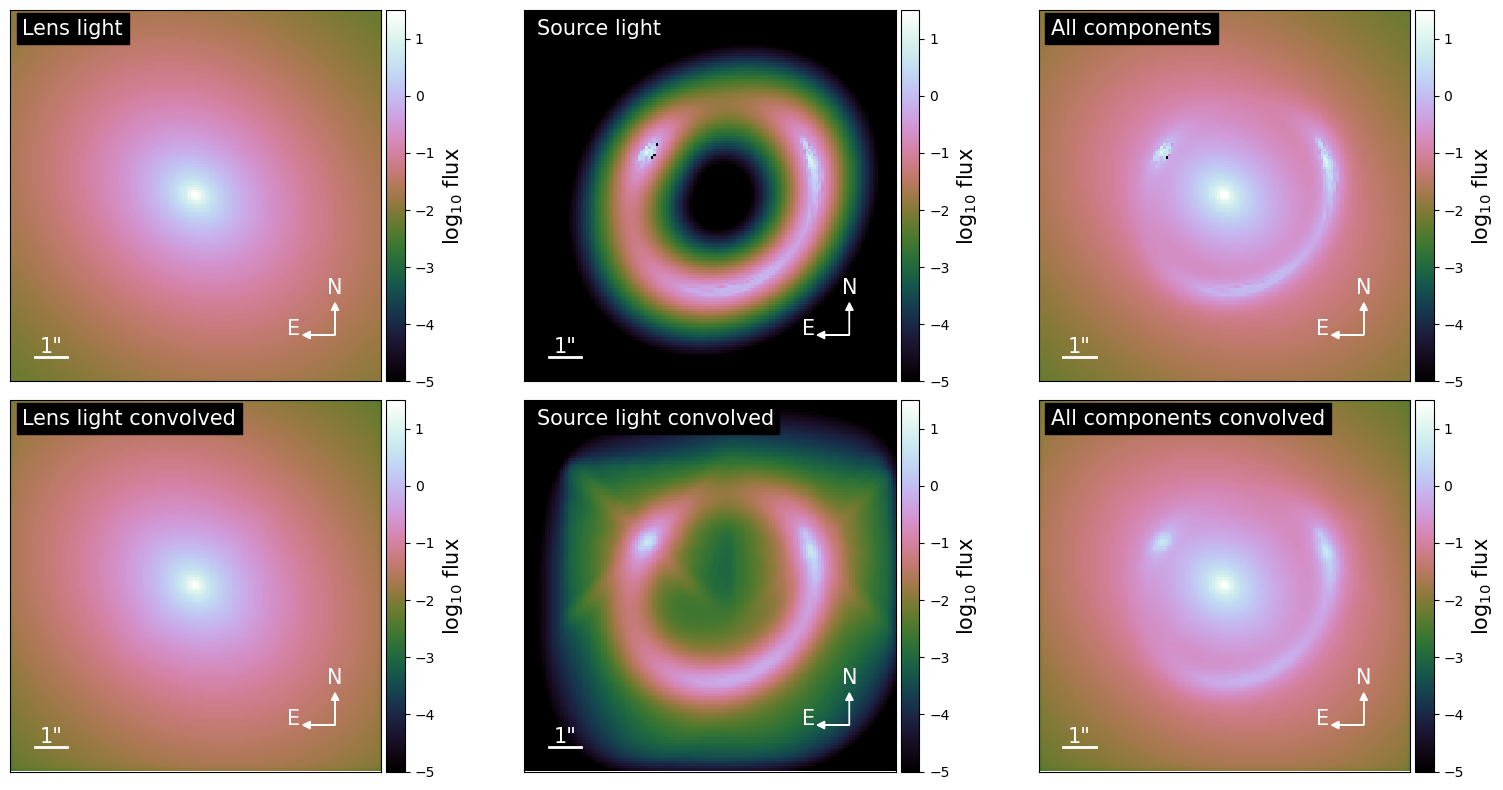

{'kwargs_lens': [{'theta_E': 2.877700291036813, 'gamma': 2.0, 'e1': -0.017064794251099965, 'e2': 0.1041494176930802, 'center_x': 0.1321800015508378, 'center_y': 0.005086665000591081}, {'gamma1': -0.009057299320301845, 'gamma2': -0.02900878757293917, 'ra_0': 0.0, 'dec_0': 0.0}], 'kwargs_source': [{'amp': 38.27131329071024, 'R_sersic': 0.28581152009566596, 'n_sersic': 1.0, 'e1': 0.00177171413403545, 'e2': -0.060398080431626214, 'center_x': -0.3270165041556909, 'center_y': -0.1654001022822717}, {'amp': array([2004.04018195,  906.11418007,  492.85165703,  599.08720089,
        966.12212077, 1134.62436142, -628.30533499, -450.72638839,
        -86.65543112,  -20.26497153, 1179.34324972,  777.13019481,
       1036.8238049 ,  126.88075033,  113.51430696, -114.63045125,
        -47.29729533, -132.41757282,  257.35581271,  -38.22535758,
         -8.55943129,   97.1024243 ,  538.17264984,  474.46156576,
        172.03774663, -209.7550389 ,  128.97734479,  395.15571393,
        442.04078924,  276

In [ ]:
f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

model_plot.decomposition_plot(
    ax=axes[0, 0], text="Lens light", lens_light_add=True, unconvolved=True
)
model_plot.decomposition_plot(
    ax=axes[1, 0], text="Lens light convolved", lens_light_add=True
)
model_plot.decomposition_plot(
    ax=axes[0, 1], text="Source light", source_add=True, unconvolved=True
)
model_plot.decomposition_plot(
    ax=axes[1, 1], text="Source light convolved", source_add=True
)
model_plot.decomposition_plot(
    ax=axes[0, 2],
    text="All components",
    source_add=True,
    lens_light_add=True,
    unconvolved=True,
)
model_plot.decomposition_plot(
    ax=axes[1, 2],
    text="All components convolved",
    source_add=True,
    lens_light_add=True,
    point_source_add=True,
)
f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.0, hspace=0.05)
plt.show()
print(kwargs_result)

## MCMC-run:

In [ ]:
# Define the local path to save the backend file:

local_backend_path = "mcmc_backend.h5"

fitting_kwargs_list_mcmc = [
    ["update_settings", {"lens_remove_fixed": [[0, ["gamma"]]]}][
        "MCMC",
        {
            "n_burn": 0,
            "n_run": 2500,
            "n_walkers": 100,
            "sigma_scale": 0.1,
            "threadCount": 3,
            "backend_filename": local_backend_path,
            "start_from_backend": False,
        },
    ]
]

chain_list_mcmc = fitting_seq.fit_sequence(fitting_kwargs_list_mcmc)
kwargs_result_mcmc = fitting_seq.best_fit()

100%|██████████| 2500/2500 [11:17:41<00:00, 16.26s/it]

Computing the MCMC...
Number of walkers =  100
Burn-in iterations:  0
Sampling iterations (in current run): 2500
40678.02948999405 time taken for MCMC sampling


## Trace Plot of the MCMC-run:

/tmp/ipykernel_20/3644455581.py:16: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if not samples_mcmc == []:


N_step: 2500, N_walkers: 100, N_params: 19
theta_E_lens0 2.9246 ± 0.0016
gamma_lens0 1.4644 ± 0.0108
e1_lens0 -0.0020 ± 0.0011
e2_lens0 0.1737 ± 0.0039
center_x_lens0 0.2237 ± 0.0032
center_y_lens0 0.0966 ± 0.0013
gamma1_lens1 -0.0008 ± 0.0010
gamma2_lens1 0.0940 ± 0.0022
R_sersic_source_light0 0.2305 ± 0.0085
e1_source_light0 -0.0571 ± 0.0072
e2_source_light0 -0.2318 ± 0.0122
center_x_source_light0 0.0020 ± 0.0050
center_y_source_light0 -0.0030 ± 0.0020
beta_source_light1 0.0422 ± 0.0013
R_sersic_lens_light0 1.1981 ± 0.0038
e1_lens_light0 0.0271 ± 0.0009
e2_lens_light0 0.0964 ± 0.0009
center_x_lens_light0 0.0995 ± 0.0005
center_y_lens_light0 -0.0796 ± 0.0004


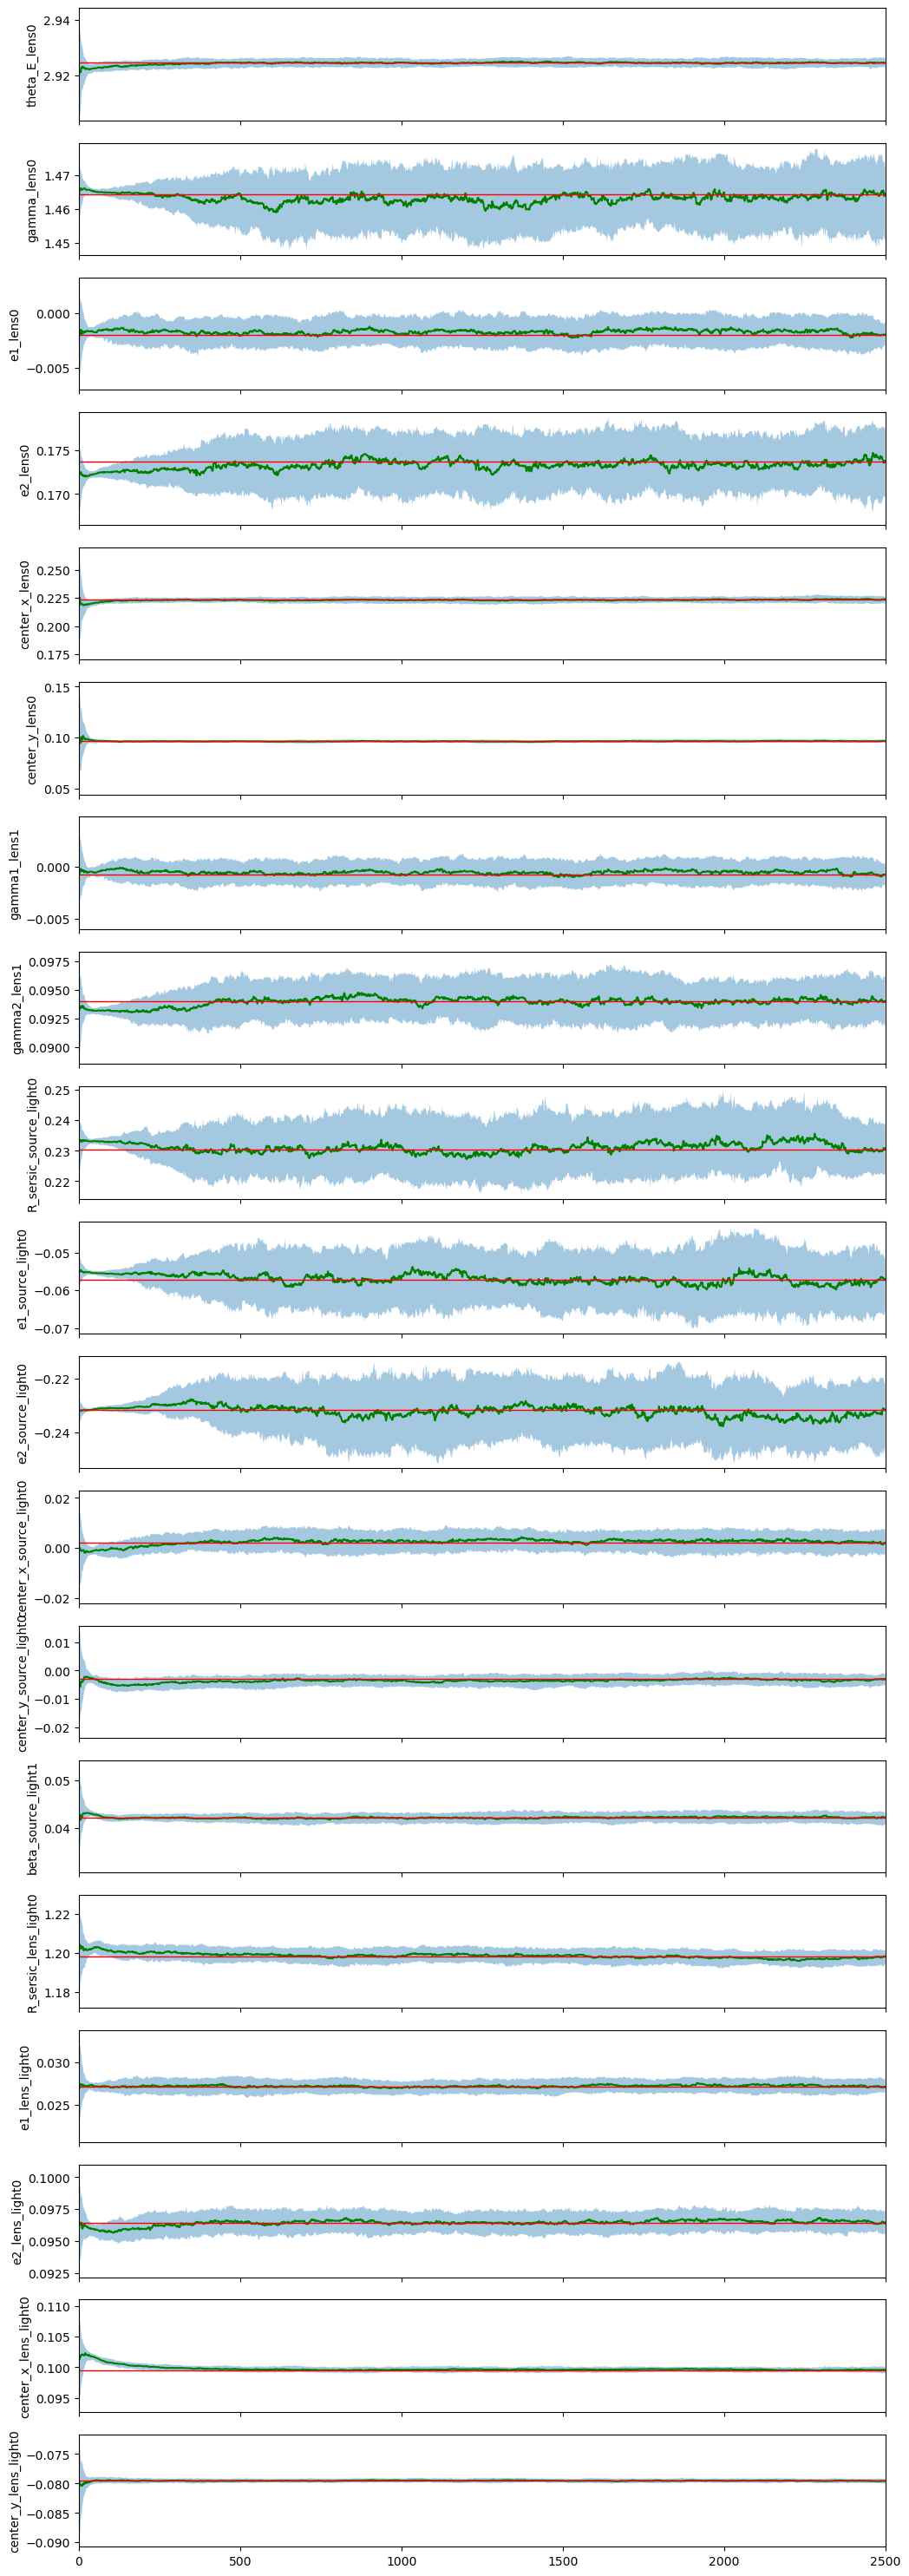

In [ ]:
samples_mcmc = []

if chain_list_mcmc[-1][0] != "PSO":
    # if MCMC chain was broken in the chunks,
    # we join the chunks to make the full chain
    mcmc_repeat = 1

    for k in range(len(chain_list_mcmc) - mcmc_repeat, len(chain_list_mcmc)):
        if samples_mcmc == []:
            samples_mcmc = chain_list_mcmc[k][1]
        else:
            samples_mcmc = np.vstack((samples_mcmc, chain_list_mcmc[k][1]))

        param_mcmc = chain_list_mcmc[k][2]

if not samples_mcmc == []:
    n_params = samples_mcmc.shape[1]
    n_walkers = 100
    n_step = 2500
    n_burn = 0

    print("N_step: {}, N_walkers: {}, N_params: {}".format(n_step, n_walkers, n_params))

    chain = np.empty((n_walkers, n_step, n_params))

    for i in range(n_params):
        samples = samples_mcmc[:, i]
        reshaped_samples = samples.reshape((n_walkers, n_step), order="F")
        chain[:, :, i] = reshaped_samples

    mean_pos = np.zeros((n_params, n_step))
    median_pos = np.zeros((n_params, n_step))
    std_pos = np.zeros((n_params, n_step))
    q16_pos = np.zeros((n_params, n_step))
    q84_pos = np.zeros((n_params, n_step))

    for i in range(n_params):
        for j in range(n_step):
            mean_pos[i][j] = np.mean(chain[:, j, i])
            median_pos[i][j] = np.median(chain[:, j, i])
            std_pos[i][j] = np.std(chain[:, j, i])
            q16_pos[i][j] = np.percentile(chain[:, j, i], 16.0)
            q84_pos[i][j] = np.percentile(chain[:, j, i], 84.0)

    fig, ax = plt.subplots(n_params, sharex=True, figsize=(8, 6))

    burnin = -1
    last = n_step

    medians = []

    param_values = [
        median_pos[0][last - 1],
        (q84_pos[0][last - 1] - q16_pos[0][last - 1]) / 2,
        median_pos[1][last - 1],
        (q84_pos[1][last - 1] - q16_pos[1][last - 1]) / 2,
    ]

    for i in range(n_params):
        print(
            param_mcmc[i],
            "{:.4f} ± {:.4f}".format(
                median_pos[i][last - 1],
                (q84_pos[i][last - 1] - q16_pos[i][last - 1]) / 2,
            ),
        )

        ax[i].plot(median_pos[i][:last], c="g")
        ax[i].axhline(np.median(median_pos[i][burnin:last]), c="r", lw=1)
        ax[i].fill_between(
            np.arange(last), q84_pos[i][:last], q16_pos[i][:last], alpha=0.4
        )

        ax[i].set_ylabel(param_mcmc[i], fontsize=10)
        ax[i].set_xlim(0, last)

        medians.append(np.median(median_pos[i][burnin:last]))
    if True:
        fig.set_size_inches((12.0, 2 * len(param_mcmc)))
        plt.show()

## The Corner Plot:

Number of non-linear parameters in the MCMC process: 19
Parameters in order: ['theta_E_lens0', 'gamma_lens0', 'e1_lens0', 'e2_lens0', 'center_x_lens0', 'center_y_lens0', 'gamma1_lens1', 'gamma2_lens1', 'R_sersic_source_light0', 'e1_source_light0', 'e2_source_light0', 'center_x_source_light0', 'center_y_source_light0', 'beta_source_light1', 'R_sersic_lens_light0', 'e1_lens_light0', 'e2_lens_light0', 'center_x_lens_light0', 'center_y_lens_light0']
Number of evaluations in the MCMC process: 250000
250000
Shape of samples_mcmc_cut: (5000, 19)


/tmp/ipykernel_20/3548470525.py:15: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if not samples_mcmc_cut == []:


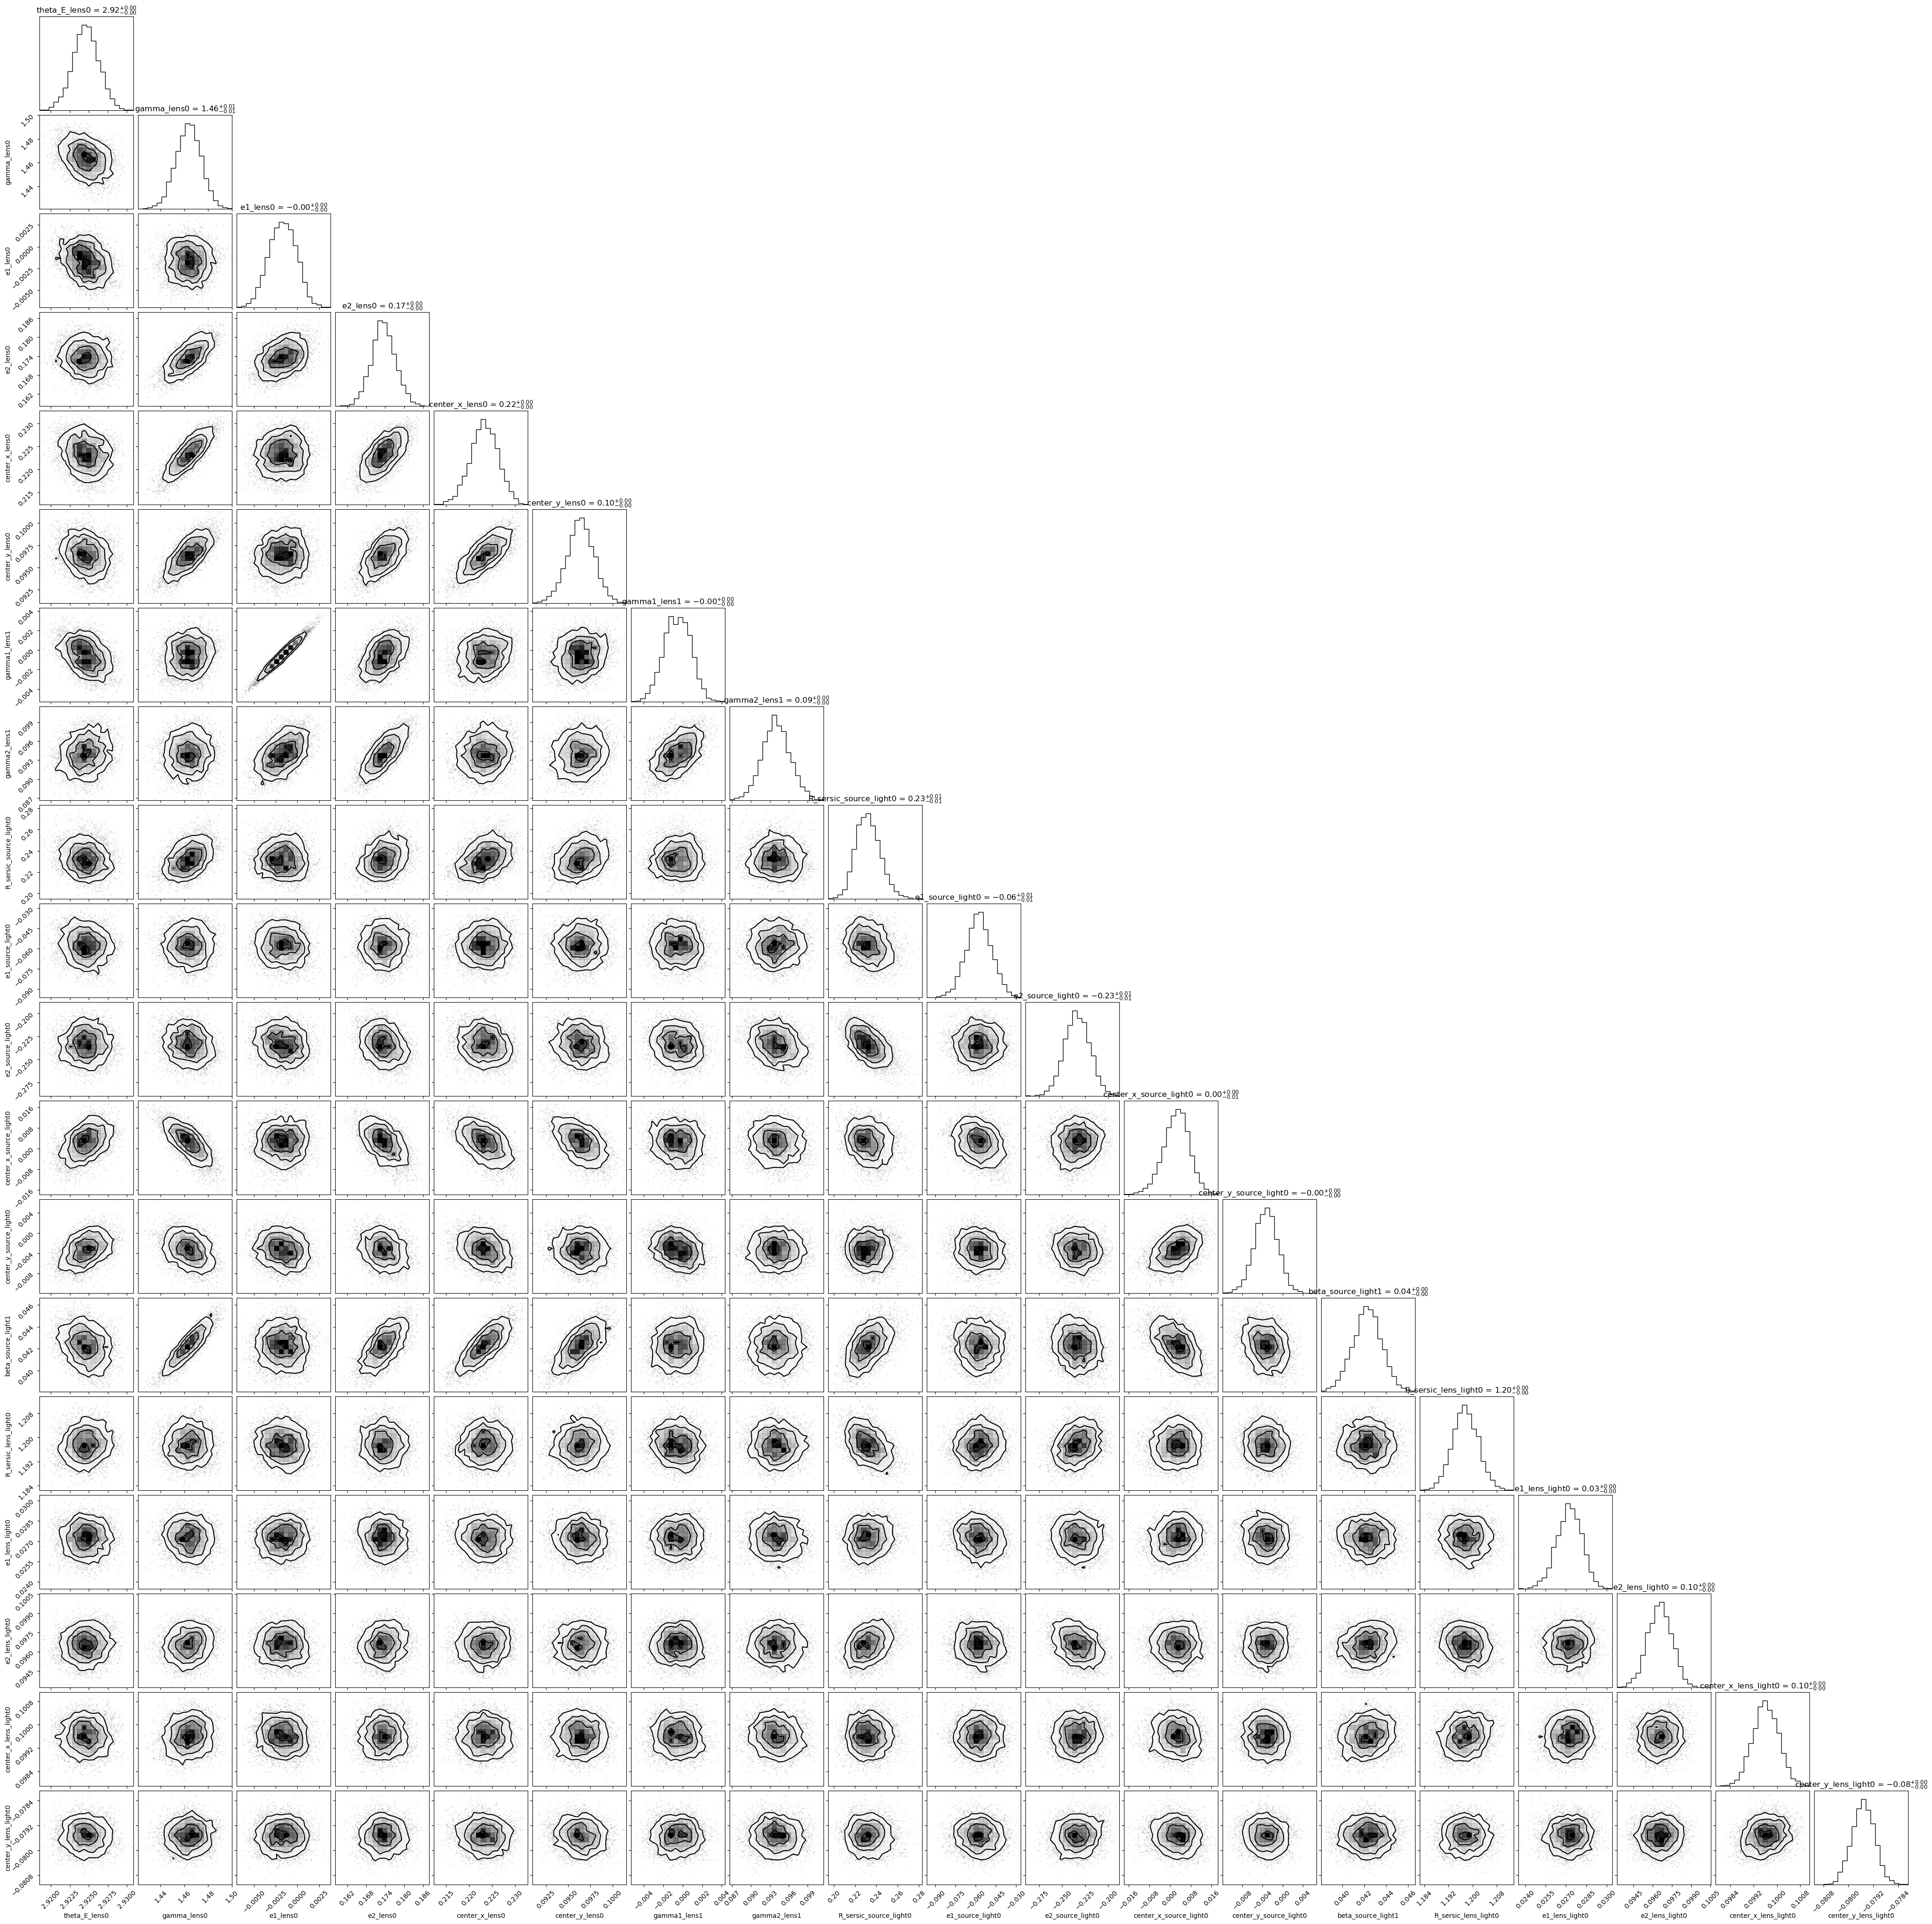

In [ ]:
if len(chain_list_mcmc) > 0:
    sampler_type, samples_mcmc, param_mcmc, dist_mcmc = chain_list_mcmc[0]

    param_class = fitting_seq.param_class

    print("Number of non-linear parameters in the MCMC process:", len(param_mcmc))
    print("Parameters in order:", param_mcmc)
    if samples_mcmc is not None:
        print("Number of evaluations in the MCMC process:", np.shape(samples_mcmc)[0])
        n_sample = len(samples_mcmc)
        print(n_sample)
        burnin = 1500
        thin = 20
        samples_mcmc_cut = chain[:, burnin::thin, :].reshape((-1, n_params))
        if not samples_mcmc_cut == []:
            n, num_param = np.shape(samples_mcmc_cut)
            print("Shape of samples_mcmc_cut:", samples_mcmc_cut.shape)
            plot = corner.corner(samples_mcmc_cut, labels=param_mcmc, show_titles=True)
    else:
        print("No samples available for corner plot.")
else:
    print("No MCMC chains available.")

## Visualization of the MCMC-run fit:

-0.9293203521319686 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  0.9293203521319626


/opt/conda/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:43: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/opt/conda/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:101: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(self._data), origin='lower',
/opt/conda/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:136: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(self._model), origin='lower', vmin=v_min, vmax=v_max,
/tmp/ipykernel_20/3260937798.py:28: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


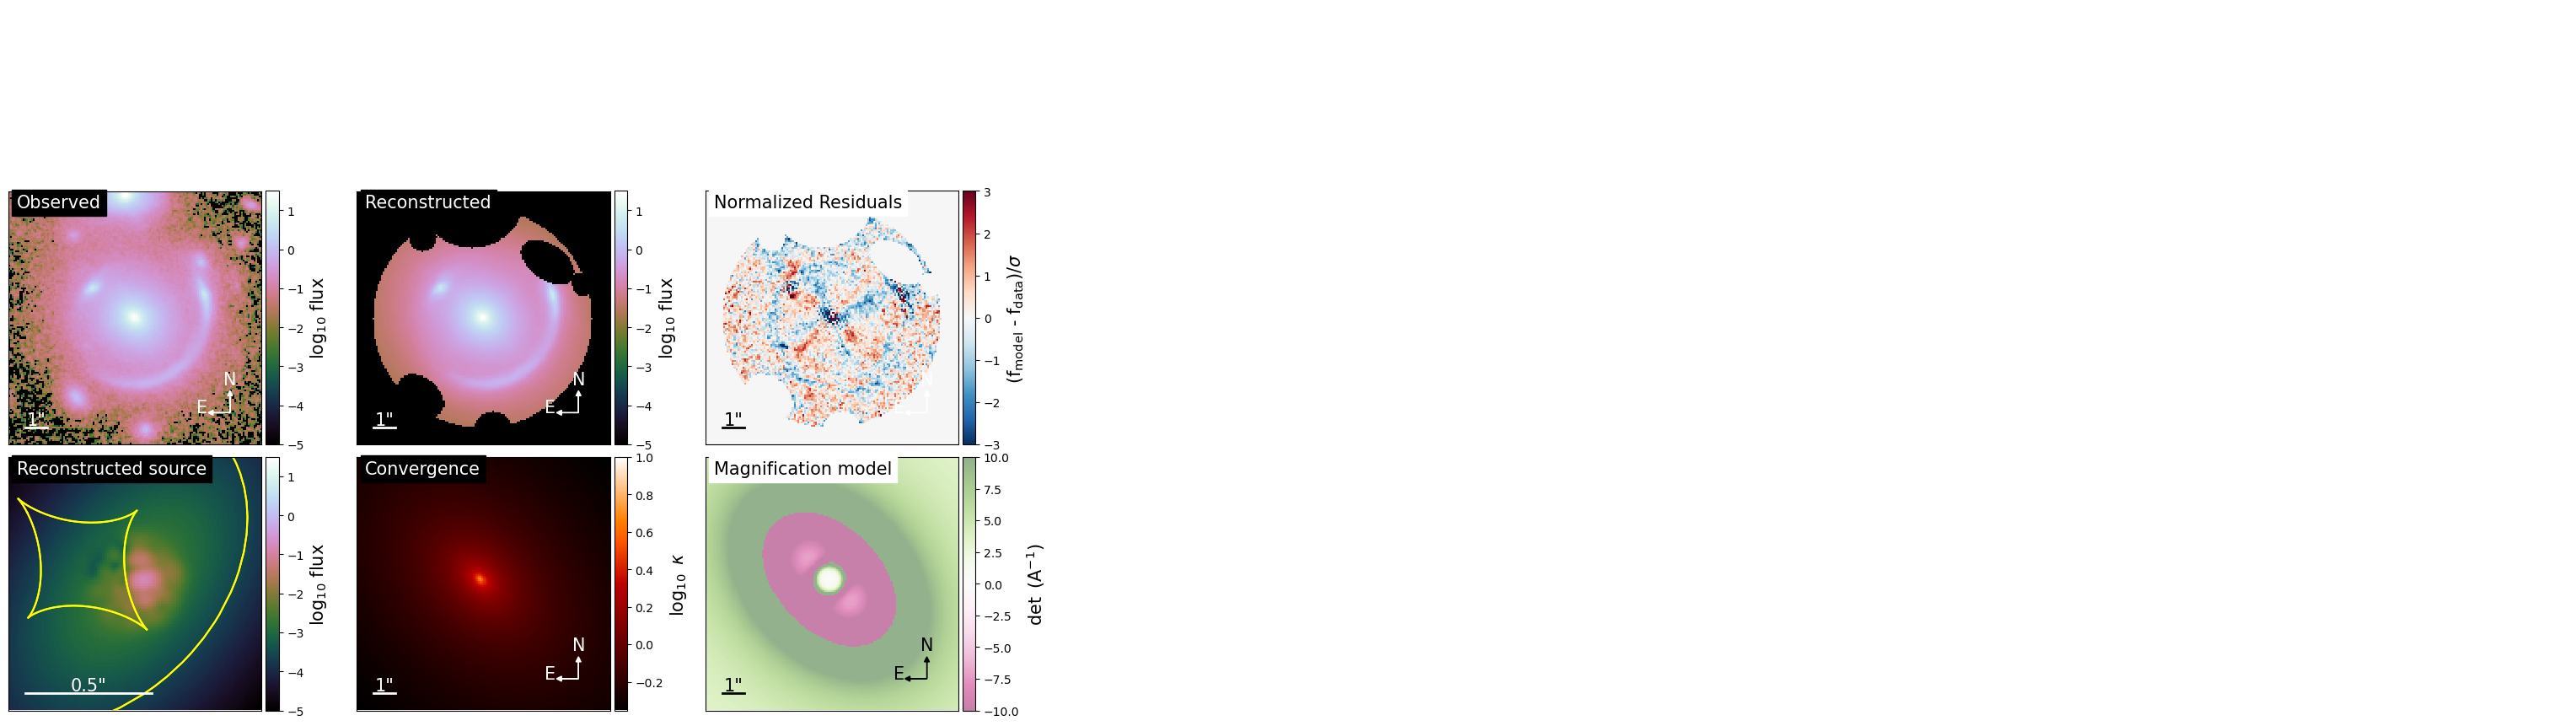

In [ ]:
model_plot = ModelPlot(
    multi_band_list,
    kwargs_model,
    kwargs_result_mcmc,
    arrow_size=0.02,
    cmap_string="cubehelix",
    image_likelihood_mask_list=kwargs_likelihood["image_likelihood_mask_list"],
)

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

model_plot.data_plot(ax=axes[0, 0])
model_plot.model_plot(ax=axes[0, 1])
model_plot.normalized_residual_plot(ax=axes[0, 2], v_min=-3, v_max=3, cmap="RdBu_r")
model_plot.source_plot(
    ax=axes[1, 0], deltaPix_source=0.01, numPix=100, with_caustics=True, scale_size=0.5
)
model_plot.convergence_plot(ax=axes[1, 1], v_max=1, cmap="gist_heat")
model_plot.magnification_plot(ax=axes[1, 2], cmap="PiYG")
f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.0, hspace=0.05)
plt.show()

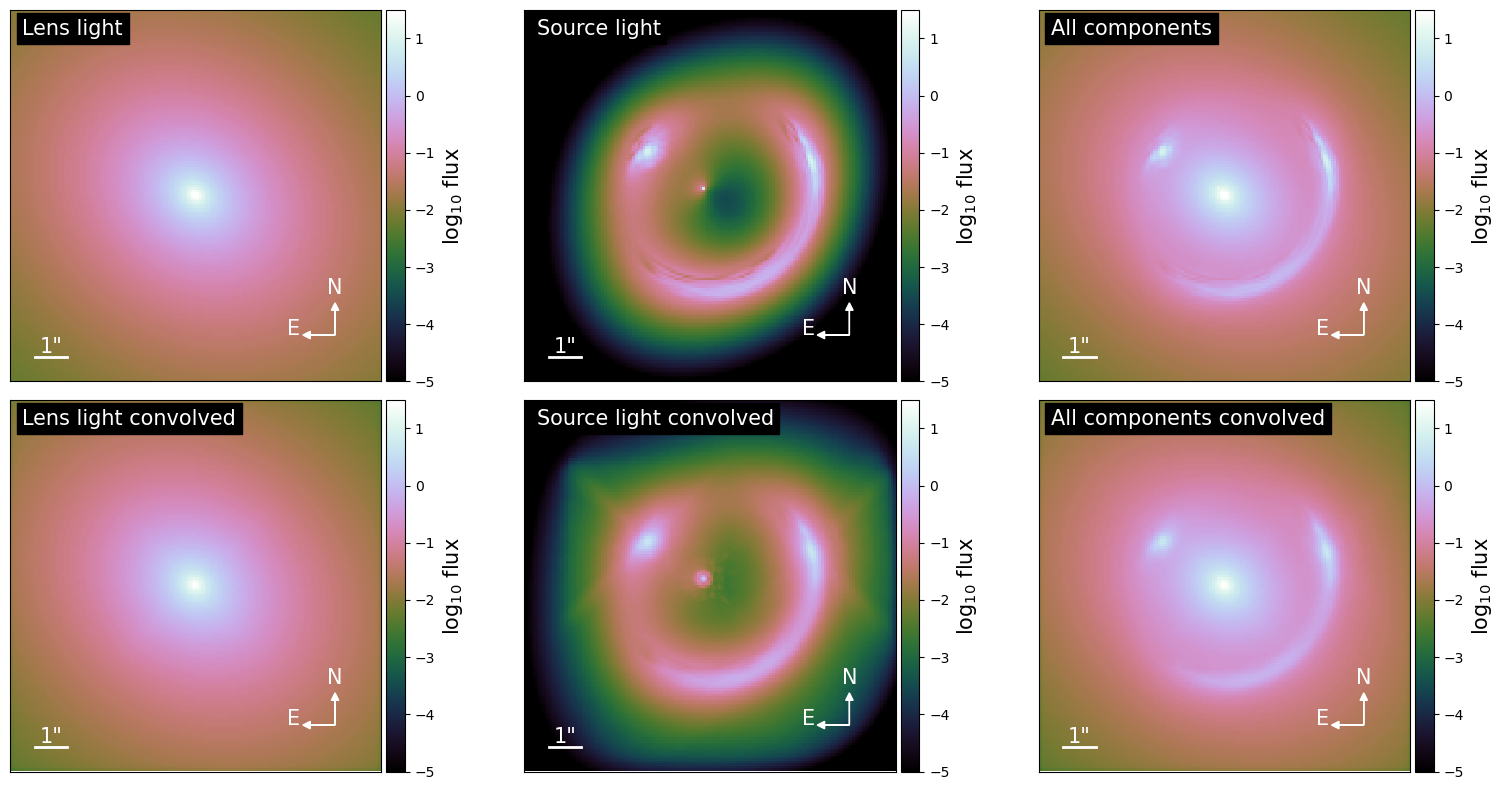

{'kwargs_lens': [{'theta_E': 2.925710746499958, 'gamma': 1.4606946787401547, 'e1': -0.0016745540299379718, 'e2': 0.17362677261339926, 'center_x': 0.22202250548326935, 'center_y': 0.09551046739449058}, {'gamma1': -0.0005586616109814435, 'gamma2': 0.09469178163112894, 'ra_0': 0.0, 'dec_0': 0.0}], 'kwargs_source': [{'amp': 11.431775273411981, 'R_sersic': 0.2316309906211224, 'n_sersic': 1.0, 'e1': -0.06021503562220009, 'e2': -0.23378127018830286, 'center_x': 0.005607099809337055, 'center_y': -0.0027570472967786207}, {'amp': array([ 1345.42327145, -1049.53170743,   207.3013725 ,   355.31208078,
        -232.04766651,    25.19548093,    68.75623256,    13.46944984,
          19.23287247,   -99.27033499,    31.18648154,    21.25003876,
          45.89396557,    99.3850644 ,   309.96147581,  -102.58643512,
         -13.53094463,   -41.17756902,   -93.26234727,  -154.85758745,
         186.89844658,    63.18089088,   -12.39444875,    15.86074528,
          -4.73791675,   -13.25972509,  -169.761

In [ ]:
f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

model_plot.decomposition_plot(
    ax=axes[0, 0], text="Lens light", lens_light_add=True, unconvolved=True
)
model_plot.decomposition_plot(
    ax=axes[1, 0], text="Lens light convolved", lens_light_add=True
)
model_plot.decomposition_plot(
    ax=axes[0, 1], text="Source light", source_add=True, unconvolved=True
)
model_plot.decomposition_plot(
    ax=axes[1, 1], text="Source light convolved", source_add=True
)
model_plot.decomposition_plot(
    ax=axes[0, 2],
    text="All components",
    source_add=True,
    lens_light_add=True,
    unconvolved=True,
)
model_plot.decomposition_plot(
    ax=axes[1, 2],
    text="All components convolved",
    source_add=True,
    lens_light_add=True,
    point_source_add=True,
)
f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.0, hspace=0.05)
plt.show()
print(kwargs_result_mcmc)

## Saving the MCMC-run joblib file:

In [ ]:
multi_band_list_out = fitting_seq.multi_band_list
kwargs_fixed_out = fitting_seq.kwargs_fixed

init_samples = 2500  # cannot be 'None' for MCMC

input = [
    fitting_kwargs_list_mcmc,
    multi_band_list,
    kwargs_model,
    kwargs_constraints,
    kwargs_likelihood,
    kwargs_params,
    init_samples,
]

output = [kwargs_result_mcmc, multi_band_list_out, chain_list_mcmc, kwargs_fixed_out]

output_path = "DESIJ1018-0121_mcmc_output.joblib"

with open(output_path, "wb") as f:
    joblib.dump([input, output], f, compress=True)

In [ ]:
multi_band_list_out = fitting_seq.multi_band_list
kwargs_fixed_out = fitting_seq.kwargs_fixed

init_samples = 2500  # cannot be 'None' for MCMC

input = [
    fitting_kwargs_list_mcmc,
    multi_band_list,
    kwargs_model,
    kwargs_constraints,
    kwargs_likelihood,
    kwargs_params,
    init_samples,
]

output = [kwargs_result_mcmc, multi_band_list_out, kwargs_fixed_out]

output_path = "DESIJ1018-0121_mcmc_output_without_chain_list.joblib"

with open(output_path, "wb") as f:
    joblib.dump([input, output], f, compress=True)